# Analyze by loading all arrays for each sequence

In [62]:
import numpy as np
import numpy.linalg as la
import pykep as pk
from pykep.planet import jpl_lp
from pykep import epoch
import pygmo as pg
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os
import spiceypy as spice

%matplotlib notebook

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [104]:
import sys
sys.path.append("../")
import pyxplorer as pxp

In [115]:
# get number of files
filenames = os.listdir("optim_res")
filenames

['seq_saturn-saturn-earth4.npy',
 'seq_saturn-saturn-earth5.npy',
 'seq_saturn-saturn-jupiter-earth3.npy',
 'seq_saturn-saturn-earth1.npy',
 'seq_saturn-saturn-mars-earth1.npy',
 'seq_saturn-earth2.npy',
 'seq_saturn-jupiter-earth4.npy',
 'seq_saturn-earth3.npy',
 'seq_saturn-jupiter-earth5.npy',
 '.ipynb_checkpoints',
 'seq_saturn-saturn-earth3.npy',
 'seq_saturn-saturn-earth2.npy',
 'seq_saturn-saturn-jupiter-earth2.npy',
 'seq_saturn-saturn-jupiter-earth1.npy']

In [116]:
seq_key = ["saturn", "saturn", "earth"]
seq_name = ""
for el in seq_key:
    seq_name += el + "-"
seq_name = seq_name[:-1]

In [117]:
# get solar system
ssdict = pxp.solar_system_spice()

tof = [
    [2/pk.DAY2YEAR, 6/pk.DAY2YEAR] for el in range(len(seq_key)-1)
]

pop_list = []
prob_list = []

i_window = 0
t0_iter = [
    pk.epoch_from_string('2044-01-01 00:00:00.000').mjd2000 + i_window*30,
    pk.epoch_from_string('2044-01-01 00:00:00.000').mjd2000 + (i_window+1)*30

]
# run problem
seq = [ssdict[el] for el in seq_key]

prob_test = pxp.get_return_problem(seq, t0_iter, tof)

In [118]:
n_data_already = 0
for filename in filenames:
    if seq_name in filename:
        if n_data_already == 0:
            xload = np.load(
                os.path.join("optim_res", filename)
            )
        else:
            xload = np.concatenate(
                (xload, 
                    np.load(os.path.join("optim_res", filename))
                )
            )
        n_data_already += 1

n_data_already

5

In [119]:
ndat, _ = xload.shape
fload = []

for idx in range(ndat):
    fload.append(
        prob_test.fitness(xload[idx,:])
    )

In [120]:
ndat

7080

In [121]:
porkchop_return = pxp.porkchop_process(
    prob_test, xload, fload, len(seq_key)-1,
)

<IPython.core.display.Javascript object>


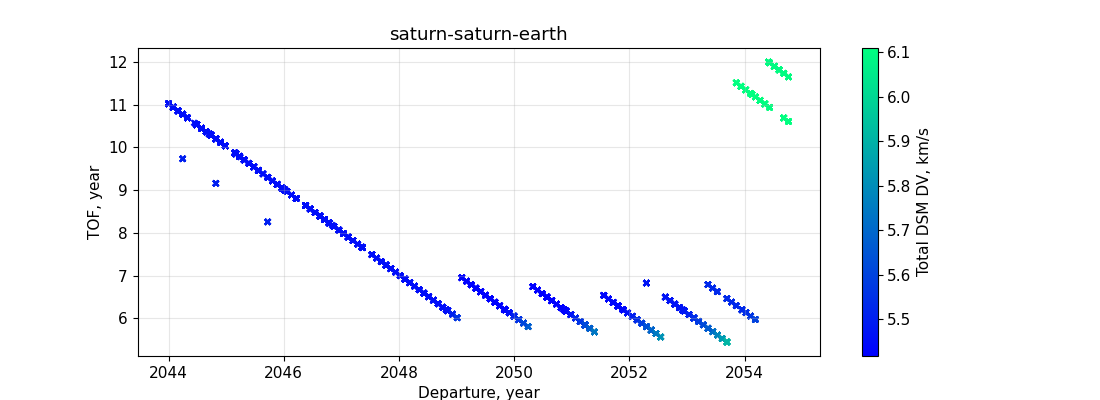

In [122]:
plt.rcParams["font.size"] = 11

fig, ax = plt.subplots(1,1,figsize=(11,4))

im0 = ax.scatter(porkchop_return['t0_matplotlib'], porkchop_return['tof_total']*pk.DAY2YEAR, 
                     c=porkchop_return['dsm_total']/1e3, cmap='winter', s=15, marker='x')

fig.colorbar(im0, label='Total DSM DV, km/s')
ax.set_title(seq_name)
ax.set(xlabel="Departure, year", ylabel="TOF, year")
ax.grid(True, alpha=0.3)

plt.show()

<IPython.core.display.Javascript object>


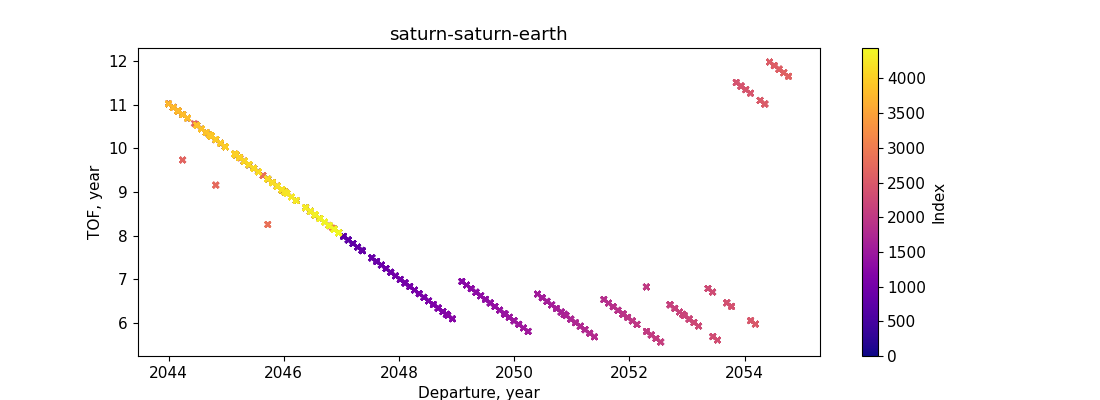

In [113]:
plt.rcParams["font.size"] = 11

fig, ax = plt.subplots(1,1,figsize=(11,4))

im0 = ax.scatter(porkchop_return['t0_matplotlib'], porkchop_return['tof_total']*pk.DAY2YEAR, 
                     c=porkchop_return['idx'], cmap='plasma', s=15, marker='x')

fig.colorbar(im0, label='Index')
ax.set_title(seq_name)
ax.set(xlabel="Departure, year", ylabel="TOF, year")

plt.show()